# Skin tone detection using Convolutional Neural Networks(CNNs) 

### Import dependencies

In [1]:
# !pip install tensorflow_hub

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


import keras
from keras import Sequential, layers, models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

### Setup data inputs

In [3]:
# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "skintype-data/train/"
test_dir = "skintype-data/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)
test_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 208 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [4]:
# Class labels

import pathlib 
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['normal_skin' 'oily_skin']


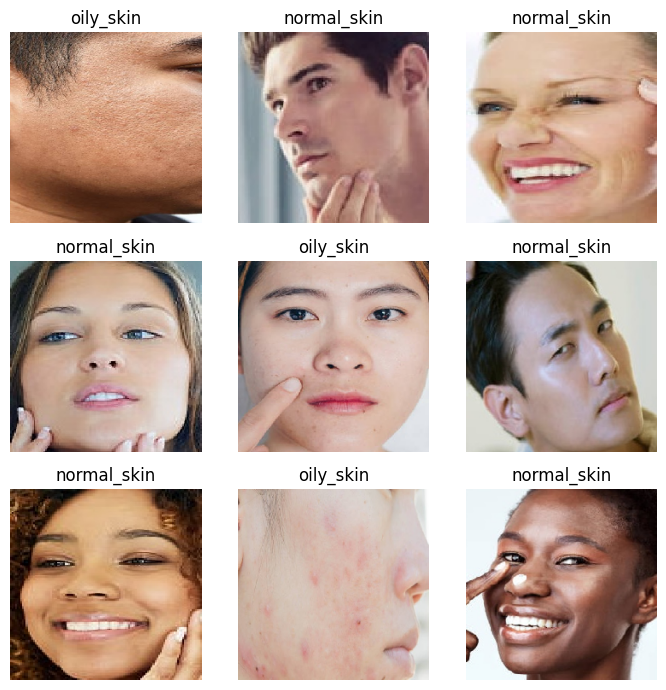

In [5]:
# Display images from train_data
plt.figure(figsize=(7, 7))
for images, labels in train_data:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i])
        ax.set_title(class_names[labels[i].argmax()])
        ax.axis("off")

    if i == 8:
        break

plt.tight_layout()
plt.show()

### Build Keras Sequential CNN model
-----------

#### Steps:

- Build the model using the Sequential API from TensorFlow's Keras module.
- Define the convolutional layers (Conv2D) with 32 filters of size 3x3 and select the activation function(the ReLU activation function has been used here). 
- Define pooling layers with each pooling layer comin after a convolutional layer. Max pooling(MaxPooling2D) is used here with a pool size of 2x2 for reducing the spatial dimensions of the feature maps which would given given off by the convolutional layers.
- Flatten the feature maps given off by the final pooling layer into a 1D vector using the Flatten layer.
- Add a fully connected layer (Dense) with 128 units and ReLU activation is added for higher-level feature learning.
- Add an output layer with a single unit and a sigmoid activation function for final classification into oily skin or normal skin(Sigmoid is used here because it performs well for binary classification).
- Finally, compile the model with the Adam optimizer, binary cross-entropy loss function, and we select accuracy as the evaluation metric.

In [6]:
# Define the model architecture
model = Sequential()

# Add convolutional and pooling layers(MaxPooling is used here)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())
# Add a fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [9]:
# model.summary()

In [10]:
# # Fit the model
# model.fit(train_data,
#           validation_data=test_data, 
#           epochs=10,
#           )  

In [11]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """ Reads in an image from filename, turns it into a tensor and reshapes into (224,224,3). """
  
  # Read in the image and decode it into a tensor
  img = tf.io.read_file(filename)
  img = tf.image.decode_jpeg(img)
    
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [12]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  
  print('Prediction Probabilities : ', pred[0])

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Predicted skintype: {pred_class}")
  plt.axis(False);

In [13]:
# # Test model on oily skin
# pred_and_plot(model=model, 
#               filename="skintype-data/test/oily_skin/c129.jpeg", 
#               class_names=class_names)

In [14]:
# # Test model on normal skin
# pred_and_plot(model=model, 
#               filename="skintype-data/test/normal_skin/c116.jpeg", 
#               class_names=class_names)